### Balanceo ###

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

In [4]:
bank = pd.read_csv('bank-full (1).csv', sep=';')

In [10]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no


In [6]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
bank.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [8]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [9]:
bank = bank[bank['education'] != 'unknown']

In [11]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

colunas = ["default", "housing", "loan", "y", "education", "marital", "poutcome", 
           "contact"]

df_col=list(colunas)

for i in range(len(df_col)):
    bank[df_col[i]] = le.fit_transform(bank[df_col[i]])

In [12]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,1,2,0,2143,1,0,2,5,may,261,1,-1,0,3,0
1,44,technician,2,1,0,29,1,0,2,5,may,151,1,-1,0,3,0
2,33,entrepreneur,1,1,0,2,1,1,2,5,may,76,1,-1,0,3,0
5,35,management,1,2,0,231,1,0,2,5,may,139,1,-1,0,3,0
6,28,management,2,2,0,447,1,1,2,5,may,217,1,-1,0,3,0


In [14]:
bank.month = pd.to_datetime(bank.month).dt.month

OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 1-05-01 00:00:00 present at position 0

In [15]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,1,2,0,2143,1,0,2,5,may,261,1,-1,0,3,0
1,44,technician,2,1,0,29,1,0,2,5,may,151,1,-1,0,3,0
2,33,entrepreneur,1,1,0,2,1,1,2,5,may,76,1,-1,0,3,0
5,35,management,1,2,0,231,1,0,2,5,may,139,1,-1,0,3,0
6,28,management,2,2,0,447,1,1,2,5,may,217,1,-1,0,3,0


In [ ]:
bank.education.unique()

array([2, 1, 0])

In [ ]:
bank = pd.get_dummies(bank)
bank.head().T

,0,1,2,5,6
age,58,44,33,35,28
marital,1,2,1,1,2
education,2,1,1,2,2
default,0,0,0,0,0
balance,2143,29,2,231,447
housing,1,1,1,1,1
loan,0,0,1,0,1
contact,2,2,2,2,2
day,5,5,5,5,5
month,1,1,1,1,1


<AxesSubplot:xlabel='y', ylabel='count'>

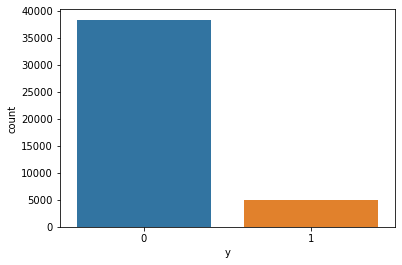

In [ ]:
sns.countplot(x = 'y', data = bank,
             order = bank['y'].value_counts().index)

In [ ]:
X = bank.drop("y", axis = 1)
y = bank.y

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
lr = LogisticRegression()
lr.fit(X_train, y_train)

C:\Users\Luisa Fernanda\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
predito = lr.predict(X_test)

In [ ]:
accuracy_score(y_test, predito)

0.8912261278715748

In [ ]:
print (classification_report(y_test, predito))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      9596
           1       0.58      0.19      0.28      1243

    accuracy                           0.89     10839
   macro avg       0.74      0.58      0.61     10839
weighted avg       0.87      0.89      0.87     10839



## Nearmiss

In [ ]:
X = bank.drop("y", axis = 1)
y = bank.y

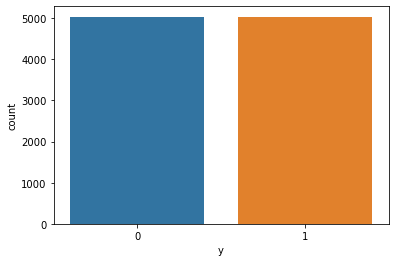

In [ ]:
nr = NearMiss()
X, y = nr.fit_resample(X, y)
ax = sns.countplot(x=y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
lr = LogisticRegression()

In [ ]:
lr.fit(X_train, y_train)

C:\Users\Luisa Fernanda\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
predito = lr.predict(X_test)

In [ ]:
accuracy_score(y_test, predito)

0.8757443429932513

In [ ]:
print (classification_report(y_test, predito))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1287
           1       0.90      0.84      0.87      1232

    accuracy                           0.88      2519
   macro avg       0.88      0.87      0.88      2519
weighted avg       0.88      0.88      0.88      2519



C:\Users\Luisa Fernanda\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion Matrix


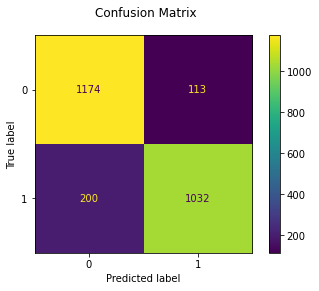

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt
disp = metrics.plot_confusion_matrix(lr,X_test,y_test)
disp.figure_.suptitle('Confusion Matrix')
print('Confusion Matrix')
plt.show()

### Aplicando SMOTE ###

In [ ]:
X = bank.drop("y", axis = 1)
y = bank.y

In [ ]:
smt = SMOTE()
X, y = smt.fit_resample(X, y)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
lr = LogisticRegression()
lr.fit(X_train, y_train)

C:\Users\Luisa Fernanda\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
resultado = lr.predict(X_test)

In [ ]:
accuracy_score(y_test, resultado)

0.8493136384988779

In [ ]:
print (classification_report(y_test, resultado))

              precision    recall  f1-score   support

           0       0.85      0.86      0.85      9662
           1       0.85      0.84      0.85      9497

    accuracy                           0.85     19159
   macro avg       0.85      0.85      0.85     19159
weighted avg       0.85      0.85      0.85     19159



### UnderSampling ###

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

X = bank.drop("y", axis=1)
y = bank.y

us = RandomUnderSampler()
X, y = us.fit_resample(X,y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
lr = LogisticRegression()
lr.fit(X_train, y_train)

C:\Users\Luisa Fernanda\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
resultado = lr.predict(X_test)

In [ ]:
accuracy_score(y_test, resultado)

0.7911869789599048

In [ ]:
print (classification_report(y_test, resultado))

              precision    recall  f1-score   support

           0       0.78      0.81      0.80      1259
           1       0.80      0.77      0.79      1260

    accuracy                           0.79      2519
   macro avg       0.79      0.79      0.79      2519
weighted avg       0.79      0.79      0.79      2519

